<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2023/blob/intro-to-probability/Introduction_to_Probabilistic_Thinking_and_Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Probabilistic Thinking and Programming**

<img src="https://www.pulsecarshalton.co.uk/wp-content/uploads/2016/08/jk-placeholder-image.jpg" width="60%" />

[Add prac relevant image.]

<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/Indaba_2023_Prac_Template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a> [Change colab link to point to prac.]

© Deep Learning Indaba 2023. Apache License 2.0.

**Authors:** Elizaveta Semenova, Kira Düsterwald & James Allingham

**Reviewers:**

**Introduction:**

Thinking probabilistically and working with probability distributions can be very powerful tools for any machine learning practitioner. Unfortunately, they are tools that are often disregarded due to their *perceived* complexity. In this practical we hope to demistify these ideas by building intuition, provided practical tips, and introducing a very powerful framework for embracing the probabilistic approach – **probabilistic programming**. We'll both motivate why we need probabilistic programming and give a introduction for using it in practice.

This prac is aimed at all knowledge levels! No matter what your prior experience with probabilistic thinking and/or programming, we are sure that you will be able to take away some useful knowledge from this practical. However, this means that depending on your level, some of the content will not be aimed at you. Don't worry, this will be clearly marked at all points. We reccomend that you try and stick to our suggestions in order to get the most out of this prac in the given time, but if curiosity gets the better of you that's also great!

**Topics:**

Content: <font color='red'>`Bayesian Probability`</font>, <font color='purple'>`Probabilistic Programming`</font>

Level: <font color='blue'>`Beginner`</font>, <font color='orange'>`Intermediate`</font> & <font color='green'>`Advanced`</font>


**Aims/Learning Objectives:**

* [<font color='blue'>`Beginner`</font>] Understand what random variables and probability distributions are.
* [<font color='blue'>`Beginner`</font>] Be able to work with probability distributions using `numpyro`.
* [<font color='orange'>`Intermediate`</font>] Understand the difference between MLE, MAP, and Bayesian learning.
* [<font color='green'>`Advanced`</font>] Understanding the challenges involved in computing Bayes rule, and how probabilistic programming solved these.
* [<font color='green'>`Advanced`</font>] Be able to implement a simple probabilistic program with `numpyro`.

**Prerequisites:**

* Basic machine learning (e.g., simple supervised and unsupervised machine learning techniques).
* Basic calculus (e.g., computing an integral).
* Python programming (with `jax` and `numpy`).

**Outline:**

[Points that link to each section. Auto-generate following the instructions [here](https://stackoverflow.com/questions/67458990/how-to-automatically-generate-a-table-of-contents-in-colab-notebook).]

**Before you start:**

For this practical, you will need to use a GPU to speed up training. To do this, go to the "Runtime" menu in Colab, select "Change runtime type" and then in the popup menu, choose "GPU" in the "Hardware accelerator" box.

**Important:** you will also need to go to "Tools" > "Settings" > "Miscellaneous" > check "Crab Mode".

**Suggested experience level in this topic:**

| Level         | Experience                            |
| --- | --- |
`Beginner`      | It is my first time being introduced to this work. |
`Intermediate`  | I have done some basic courses/intros on this topic. |
`Advanced`      | I work in this area/topic daily. |

In [ ]:
# @title [TODO] **Paths to follow:** What is your level of experience in the topics presented in this notebook? (Run Cell)
experience = "advanced" #@param ["beginner", "intermediate", "advanced"]

sections_to_follow=""

if experience == "beginner":
  sections_to_follow="Introduction -> 1.1 Subsection -> 2.1 Subsection -> Conclusion -> Feedback"
elif experience == "intermediate":
  sections_to_follow="Introduction -> 1.2 Subsection -> 2.2 Subsection -> Conclusion -> Feedback"
elif experience == "advanced":
  sections_to_follow="Introduction -> 1.3 Subsection -> 2.3 Subsection -> Conclusion -> Feedback"

print(f"Based on your experience, it is advised you follow these -- {sections_to_follow} sections. Note this is just a guideline.")

Based on your experience, it is advised you follow these -- Introduction -> 1.3 Subsection -> 2.3 Subsection -> Conclusion -> Feedback sections. Note this is just a guideline.


## Installation and Imports

In [ ]:
## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)

!pip install numpyro

import jax
from jax import random
import jax.numpy as jnp
import numpyro.distributions as dist

from scipy.stats import gaussian_kde
import matplotlib.pyplot as plt
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.family'] = 'STIXGeneral'

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# @title Helper Functions. (Run Cell)

In [ ]:
# Since we are using Jax, we will need a random key:
rng = random.PRNGKey(42)

# Probability distributions and random variables – <font color='blue'>`Beginner`</font>

*Note: unless marked otherwise, all subsections in this section are <font color='blue'>`Beginner`</font> friendly.* 🙂

In order to dive into the exciting world of probabilistic thinking and programming, we first need to build some important foundations. In particular, we will need understand what a probability distribution is, some simple but fundamental rules of probability, and how to interact with probabilities in code. Along with way, we will have some opportunities to explore some practical tips and tricks that will be very useful for our exploration of probabilistic world.

Probability distributions and random variables allow us to describe and do calculations involving random events, i.e., events whose outcomes are random. An example of such a random event would be flipping a coin or rolling a die. In the first case, the possible outcomes are *heads* or *tails*.

**Group task 1:** discuss with your neighbours, what are the possible outcomes when rolling a die?


A **random variable** $X$ allows us to assign numerical values to the possible outcomes of a random event. For example in the coin flipping example we could use a binary random varible with $X = 1$ if the coin is heads and $X = 0$ for tails.

**Group task 2:** discuss with your neighbours and write down a random variable to describe the die rolling event.

A **probability distribution** $p(X = x)$ describes the probability that $X$ takes each of its possible values $x$.

In order to make things more concrete, let's explore a few common probabilty distributions.

#### Answer to group task 1

Assuming that the die has 6 sides, the outcomes are ⚀, ⚁, ⚂, ⚃, ⚄, and ⚅.

#### Answer to group task 2


Note that there are many possible answers, here is one:

$$
X = \begin{cases}
1 \text{ if } ⚀ \\
2 \text{ if } ⚁ \\
3 \text{ if } ⚂ \\
4 \text{ if } ⚃ \\
5 \text{ if } ⚄ \\
6 \text{ if } ⚅ \\
\end{cases}
$$

### The Bernoulli distribution

A Bernoulli distribution is used to describe random events with two possible outcomes e.g., when we have a random variable that takes on one of two values $x \in \{0, 1\}$:
\begin{align}
p(X = 1) &= p \\
p(X = 0) &= 1 - p
\end{align}
where $0 \le p \le 1$. Here $p$ is a parameter which controlls the probability of each outcome. For example, in the case of a *fair* coin toss, $p = 0.5$ so that both outcomes have a 50\% chance of occuring. As we will see shortly, most distributions have multiple parameters.

A probability distribution can be uniquely defined by its probability mass function (PMF), or probability desnity function (PDF) in the case of continuous distributions. For the Bernoulli distribution we write the PMF as
\begin{align}
p(X = x) = \text{Bernoulli}(X\mid p) &= \begin{cases}
p\, & \text{if } x = 1 \\
1 - p\, & \text{if } x = 0
\end{cases} \\
&= p^x(1-p)^{1-x}.
\end{align}

**Exercise:** convince yourself that the two definitions of the Bernoulli distribution shown above are equivalent.

Now let's construct a Bernoulli distribution in code, so that we can play around with it and get some intuition.

**Note:** In this practical we are going to use `numpyro` to construct our distributions. However there are several other `jax` packages that work similarly (e.g., `distrax`) as well as several options for `tensorflow` (e.g., `tensorflow_probability`) and `pytorch` (e.g., `torch.distribution`). Don't worry too much about the specifics of how `numpyro` works, e.g., the names of the distributions and their arguments, instead try to understand what the code is doing.

In [ ]:
p = jnp.array(0.5)
bernoulli = dist.Bernoulli(probs=p)

Now that we have constructed the distribution we can get a sample from it:

In [ ]:
sample = bernoulli.sample(key=rng)
print(sample)

1


And we can evaluate the probability of observing a sample.

**Note:** the distribution objects in `numpyro` (and indeed most other libraries for probability distributions) return *log*-probabilities, rather than raw probabilities. This means that we need to take the exponent if we want to know the probabilitiy.

In [ ]:
log_prob = bernoulli.log_prob(sample)
print(f"log p(X = {sample}) = {log_prob}")
print(f"p(X = {sample}) = {jnp.exp(log_prob)}")

log p(X = 1) = -0.6931471824645996
p(X = 1) = 0.5


As expected, we get a probability of 0.5.

We can also easily get multiple samples:

In [ ]:
n = 6 #@param {type:"slider", min:1, max:10, step:1}
samples = bernoulli.sample(key=rng, sample_shape=(n,))
print(samples)

[0 0 0 1 1 0]


What if we wanted to evaulate the probability of observing all of our samples?

The `bernoulli` object we created earlier treats each each sample individually, and returns the probabilities of observing each sample on its own:

In [ ]:
individual_sample_probs = jnp.exp(bernoulli.log_prob(samples))
print(individual_sample_probs)

[0.5 0.5 0.5 0.5 0.5 0.5]


But, we can use the one of the laws of probability to compute the probability of observing all of the samples together:
$$
p(X_1=x_1, X_2=x_2, \dots, X_N=x_n) = \prod_{n=1}^N p(X_n=x_n).
$$
This is called the *product rule of probability*, and it says that for *independent* random variables, the joint probability (i.e., the probability of observing them all together) is equal to the product of the individual probabilities.

Now, let's calculate the joint probability of our samples.

In [ ]:
joint_prob = jnp.prod(individual_sample_probs)
print(joint_prob)

0.015625


**Group task 3:** Discuss with your neighbour, why do you think that libraries usually return *log*-probabilities?

**Group task 4:** Play with the following slider, and make sure that you understand the role of the Bernoulli distribution's $p$ parameter.

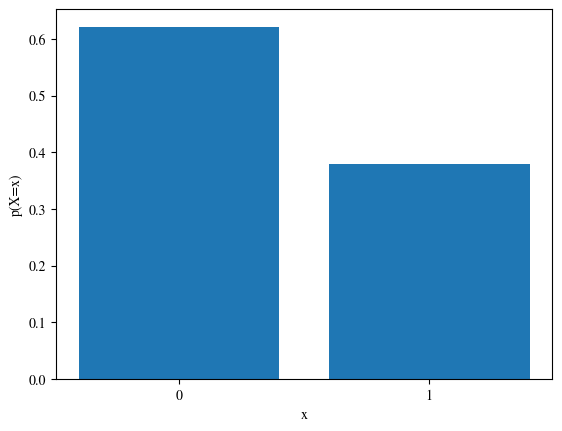

In [ ]:
#@title Bernolli distribution interactive excercise { run: "auto" }

p_ = 0.37 #@param {type:"slider", min:0, max:1, step:0.01}

n_ = 1000
bernoulli_ = dist.Bernoulli(probs=p_)
samples_ = bernoulli_.sample(key=rng, sample_shape=(n_,))

num_ones = (samples_ == 1.).sum()
num_zeros = (samples_ == 0.).sum()

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.bar([0, 1], [num_zeros/n_, num_ones/n_])
ax.set_xticks([0, 1])
ax.set_xlabel('x')
ax.set_ylabel('p(X=x)')
plt.show()

#### Answer to group task 3


The answer, as is often the case, is numerical stability! When working with numbers between 0 and 1 (i.e., probabilities) it is easy to run into underflow.

For example, consider computing the probability of several independent events $A$, $B$, $C$, $\ldots$:
$$
p(A, B, C, \ldots) = p(A) \times p(B) \times p(C) \times \ldots,
$$
because we are multiplying numbers that are between 0 and 1, we know that the result will be smaller for each multiplication. As we perform more and more multiplications, it becomes more likely that the computation will underflow and erroneously produce a result of 0.

We can avoid this problem by instead working with log-probabilities. Continuing the above example we get
$$
\log p(A, B, C, \ldots) = \log p(A) + \log p(B) + \log p(C) + \ldots,
$$
where by the log laws, we have replaced all of the multiplications with additions, thereby avoiding any numerical issues.

## The categorical distribution

A categorical distribution is used to model random events with multiple *discrete* outcomes, such as the die rolling event from above. By discrete, we mean that there is a countable number of outcomes. We will tackle uncountable outcomes shortly.

As with the Bernoulli distribution, we can characterise the categorical distribution with its PMF:
\begin{align}
p(X = x) = \text{categorical}(X\mid\mathbf{p}) = \prod_{k=1}^K p_k^{[x=k]},
\end{align}
where $K$ is the number of outcomes, $\textbf{p} = [p_1, p_2, \dots, p_K]$, $p_k$ is the probability of the $k$th outcome, $\sum_k p_k = 1$, and $[x = k]$ is called an Iverson bracket which evaluates to 1 if $x = k$ and 0 otherwise.

**Exercise:** convince yourself that a categorical distribution with $K = 2$ is equivalent to a Bernoulli distribution.

Now, let's start playing with this distribution in code!

In [ ]:
ps = jnp.array([0.1, 0.2, 0.3, 0.4])
categorical = dist.Categorical(probs=ps)

As before we can take some samples:

In [ ]:
samples = categorical.sample(key=rng, sample_shape=(10,))
print(samples)

[3 2 1 3 3 1 2 1 3 3]


And compute the probability for each of the random events:

In [ ]:
print(f"p(X=0) = {jnp.exp(categorical.log_prob(0)):.1f}")
print(f"p(X=1) = {jnp.exp(categorical.log_prob(1)):.1f}")
print(f"p(X=2) = {jnp.exp(categorical.log_prob(2)):.1f}")
print(f"p(X=3) = {jnp.exp(categorical.log_prob(3)):.1f}")

p(X=0) = 0.1
p(X=1) = 0.2
p(X=2) = 0.3
p(X=3) = 0.4


**Group task 5:** Play with the following sliders, which control the paramters of the categorical distribution. Note that because $\sum_k p_k = 1$, we are using an alternative way to represent the categorical distribution. Instead of specifying the probabilities $p_k$, we specifiy logits $l_k$. Each $p_k$ is then computed as
$$
p_k = \frac{\exp(l_k)}{\sum_{k'}\exp(l_k)},
$$
i.e., using the softmax function.

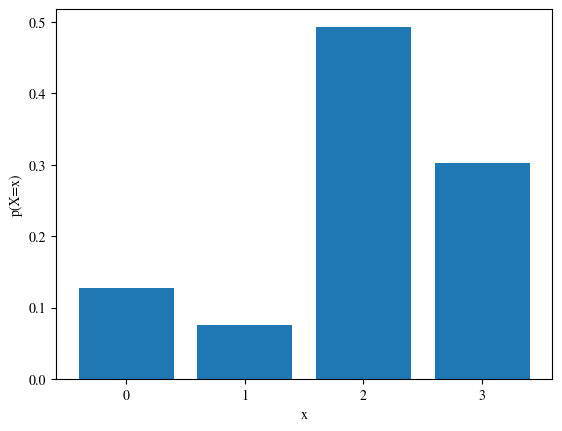

In [ ]:
#@title categorical distribution interactive excercise {run: "auto"}
l_0 = 0.7 #@param {type:"slider", max:4, step:0.1}
l_1 = 0.3 #@param {type:"slider", max:4, step:0.1}
l_2 = 2 #@param {type:"slider", max:4, step:0.1}
l_3 = 1.6 #@param {type:"slider", max:4, step:0.1}

logits_ = jnp.array([l_0, l_1, l_2, l_3], dtype=jnp.float32)
categorical_ = dist.Categorical(logits=logits_)
samples_ = categorical_.sample(key=rng, sample_shape=(1000,))

values =[0, 1, 2, 3]
hist, _ = jnp.histogram(
    samples_, bins=jnp.array(values + [4]), density=True
)

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.bar(values, hist)
ax.set_xticks(values)
ax.set_xlabel('x')
ax.set_ylabel('p(X=x)')
plt.show()

## The normal distribution

The normal, also known as Gaussian, distribution is one of the most common distributions for modelling *continuous* random variables, i.e., corresponding to events with an uncountable number of outcomes. It's probability density function is
$$
p(X = x) = \mathcal{N}(x\mid \mu, \sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(\mu - x)^2}{2\sigma^2}\right),
$$
where $\mu$ and $\sigma$ are the *mean* and *standard deviation* (also called the location, and scale or square-root of the *variance* $\sigma^2$, respectively).

Once again, the best way to get a sense for this distribution is to play with some code!

**Group task 6:** play with the following sliders, and discuss with your neighbours – how do the mean and standard deviation affect the samples?

In [ ]:
normal = dist.Normal(loc=0., scale=1.)
sample = normal.sample(key=rng)
print(f"p(X = {sample}) = {jnp.exp(normal.log_prob(sample)):.5f}")

p(X = -0.1847117692232132) = 0.39219


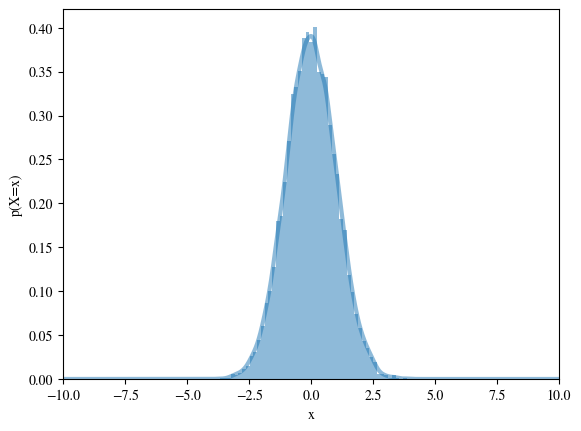

In [ ]:
#@title normal distribution interactive excercise {run: "auto"}
μ_ = 0 #@param {type:"slider", min:-5, max:5, step:0.1}
σ_ = 1 #@param {type:"slider", max:4, step:0.1}

normal = dist.Normal(loc=μ_, scale=σ_)
samples_ = normal.sample(key=rng, sample_shape=(10000,))

fig = plt.figure(dpi=100)
ax = fig.add_subplot(1, 1, 1)
ax.hist(samples_, bins=50, density=True, alpha=0.5)
x = jnp.linspace(-10, 10, 3000)
kde = gaussian_kde(samples_)
ax.plot(x, kde(x), color='C0', lw=3, alpha=0.5)
ax.set_xlabel('x')
ax.set_ylabel('p(X=x)')
ax.set_xlim(-10, 10)
plt.show()

In [ ]:
#@title Implementing the normal PDF from scratch!
#@markdown **code task 1:** Let's implement the PDF for the normal distribution from scratch, just using functions from `jax`.
#@markdown *Hint:* You may want to use `jnp.pi`, `jnp.sqrt`, and `jnp.exp`.

def normal_pdf(loc, scale, x):
    p_x =  # TODO: your code goes here!

    return p_x

In [ ]:
# @title Run me to test your code

def test_normal_pdf(pdf_fn):
  assert pdf_fn(0, 1, 0) == jnp.exp(dist.Normal(loc=0, scale=1).log_prob(0)), "Normal(X=0|0, 1) is incorrect."
  assert pdf_fn(0, 2, 0) == jnp.exp(dist.Normal(loc=0, scale=2).log_prob(0)), "Normal(X=0|0, 2) is incorrect."
  assert pdf_fn(0, 1, 1) == jnp.exp(dist.Normal(loc=0, scale=1).log_prob(1)), "Normal(X=0|1, 1) is incorrect."
  assert pdf_fn(2, 3, 1) == jnp.exp(dist.Normal(loc=2, scale=3).log_prob(1)), "Normal(X=1|2, 3) is incorrect."
  print("Nice! Your answer looks correct.")

test_normal_pdf(normal_pdf)

In [ ]:
# @title Answer to code task 1 (Try not to peek until you've given it a good try!')

def normal_pdf(loc, scale, x):
    p_x = 1 / jnp.sqrt(2 * jnp.pi * scale**2)
    p_x *= jnp.exp(-((loc - x)**2) / (2 * scale**2))

    return p_x

test_normal_pdf(normal_pdf)

#### Answer to group task 6



The mean controls where the center of the distribution is located. In other words, it controls where the most likely *location* to sample a values is.

The standard deviation controls how wide the distribution is. In other words, it controls how likely we are to draw samples farther away from the mean.

### Expected Values

The expected value of a random variable is the value that we expect to get on average when we sample a large number of different outcomes from the random event.

For example, if we consider our example of flipping a coin from above, where $X = 1$ if the coin lands on heads and $X = 0$ if the coint lands on tails, then intuitively the expected value is $0.5$.

More precisely, we can write the expected value as
$$
\mathbb{E}[X] = \sum_x x \cdot p(X=x),
$$
for a discrete random variable $X$. For a continuous random varaible, the sum would be replaced with an integral. From this definition, we can think of the expected value as a weighted average of all of the values of $X$, where the weighting for each value is the probability of observing it.

**Group task 7:** Working with your neighbour, compute the expected value for the standard six-sided die rolling event from above.

#### Answer to group task 7

Assuming that we use the following random variable to represent our die throw
$$
X = \begin{cases}
1 \text{ if } ⚀ \\
2 \text{ if } ⚁ \\
3 \text{ if } ⚂ \\
4 \text{ if } ⚃ \\
5 \text{ if } ⚄ \\
6 \text{ if } ⚅ \\
\end{cases}
$$
the expected value is
$$
\mathbb{E}[X] = \frac{1}{6} \cdot 1 + \frac{1}{6} \cdot 2 + \frac{1}{6} \cdot 3 + \frac{1}{6} \cdot 4 + \frac{1}{6} \cdot 5 + \frac{1}{6} \cdot 6 = 3.5.
$$

#### Monte-Carlo estimation

Instead of computing an expected value exactly, we can estimate it using a *Monte-Carlo* approximation.  We can describe this procedure using the following mathematical notation:
$$
\mathbb{E}[X] \approx \frac{1}{N} \sum_{n=1}^{N} x_n\,, \quad x_n \sim p(X).
$$
That is, we sample $N$ values $x_n$ from $p(X)$ and then take the average. Because the values appear proportionally to their probabilities, for large values of $N$, this approximation will become accurate.

We can also implement this in code! Let's calculate the expected value of the normal distribution $\mathcal{N}(x \mid \mu, \sigma)$.

**Group task 8:** Working with your neighbours, play with the following sliders, and try to answer these questions:
1. Start with a large value for $N$ and a small value for $\sigma$, what number does the expected value approximate? *Hint:* change the value of $\mu$ and see what happens to the expected value.
2. Now, start decreasing $N$ and/or increasing $\sigma$. What happens to the expected value?
3. What notation in the equation above do lines 7 and 9 in the code bellow correspond to?

In [ ]:
#@title Expected value interactive excercise {run: "auto"}
N = 100 #@param {type:"slider", min:1, max:400, step:1}
μ = 0 #@param {type:"slider", min:-5, max:5, step:0.1}
σ = 1 #@param {type:"slider", min: 0.1, max:4, step:0.1}

normal = dist.Normal(loc=μ, scale=σ)
samples = normal.sample(key=rng, sample_shape=(N,))

expected_value = jnp.sum(samples) / N

print(f'E[X] = {expected_value:.5f}')

E[X] = 0.00990


##### Answer to group task 8


1. The expected value for a random variable with a normal distribution is the mean parameter $\mu$. For this reason the term *mean* is often used synonimously with *expected value*.
2. As we decrease $N$ and/or increase $\sigma$, the Monte Carlo approximation becomes less accurate. **Fun fact**, for a standard Monte Carlo approximator such as this, the approximation error decreases at a rate of $\sqrt{N}$. In other words, if we multiply $N$ by 4, the error in the approximation should be divided by 2.

#### Functions of random variables

We can also calculate expected values of functions of random variables. For example, the variance of a random variable can be caculated using the following expected value
$$
\mathbb{V}[X] = \mathbb{E}[(X - \mu)^2],
$$
where $\mu = \mathbb{E}[X]$ is the mean, as described above.

In [ ]:
#@title Estimating the variance - <font color='orange'>`Intermediate`</font>
#@markdown **[Optional] code task 2:** Let's implement a Monte Carlo estimator for the variance.
#@markdown You can tell if your answer is correct if the estimated variance is close to $\sigma^2$ for large $N$.

N = 100 #@param {type:"slider", min:1, max:400, step:1}
μ = 0 #@param {type:"slider", min:-5, max:5, step:0.1}
σ = 1 #@param {type:"slider", min: 0.1, max:4, step:0.1}

normal = dist.Normal(loc=μ, scale=σ)
samples = normal.sample(
    key=rng, sample_shape=(N,)
)

# TODO: your code goes here!

print(f'V[X] = {var:.5f}')


V[X] = 1.03964


In [ ]:
# @title Answer to code task 2 (Try not to peek until you've given it a good try!')

normal = dist.Normal(loc=μ, scale=σ)
samples = normal.sample(
    key=rng, sample_shape=(N,)
)

mean = jnp.mean(samples)
var = jnp.mean((samples - mean)**2)

print(f'V[X] = {var:.5f}')

### [Optional] Reparameterisation - <font color='orange'>`Intermediate`</font>

Just for fun, let's explore an interesting (and useful!) property of the normal distribution.

Let's say we have samples $x_n$ from a $\mathcal{N}(x|0, 1)$ distribution, but what we really want is samples $y_n$ from $\mathcal{N}(y|\mu, \sigma)$. It turns out, that we can easily convert from $x_n$ to $y_n$, or vice-versa. To be specific, we can convert between the random variable $X$ to the random variable $Y$, as follows
$$
Y = \sigma X + \mu
$$
or
$$
X = Y/\sigma - \mu/\sigma.
$$

In fact, this property is several other probability distributions called the location-scale family. All of these distribuions have the similarity that they are parameterised by a location parameter $\mu$ and a scale paramter $\sigma$! Converting from one distribution to another like this is called *reparameterisation*.

As usual, let's convince ourselves that this is true with some code 😎

In [ ]:
normal_x = dist.Normal(loc=0, scale=1)
samples_x = normal_x.sample(key=rng, sample_shape=(5,))

μ = 1
σ = 2
normal_y = dist.Normal(loc=μ, scale=σ)
samples_y = normal_y.sample(key=rng, sample_shape=(5,))
# Note that we are using the same random key as above.

print(f"xs =\t\t{samples_x}")
print(f"ys =\t\t{samples_y}")
print(f"xs*σ + μ =\t{samples_x * σ + μ}")

xs =		[ 0.6122652  1.1225883 -0.8544134 -0.8127325 -0.890405 ]
ys =		[ 2.2245305   3.2451766  -0.7088268  -0.62546504 -0.78081   ]
xs*σ + μ =	[ 2.2245305   3.2451766  -0.7088268  -0.62546504 -0.78081   ]


#### [Optional] Extra reading – the reparameterisation trick - <font color='green'>`Advanced`</font>

When using gradient descent to learn the parameters of the distribution probability distribution given samples from that distribution, we run into a problem. It is not possible to back-propagate through a random operation like sampling. However, if we distribution we are trying to learn is reparameterisable (e.g., it is a from the location-scale family), then we can get around this issue. As an example, instead of doing
$$
z_i \sim \mathcal{N}(z\mid \mu, \sigma),
$$
we do
\begin{align}
x_i &\sim \mathcal{N}(x\mid 0, 1), \\
z_i &= x_i * \sigma + \mu.
\end{align}
As illustrated in the diagram below, this allows us to do back-propagation as required.

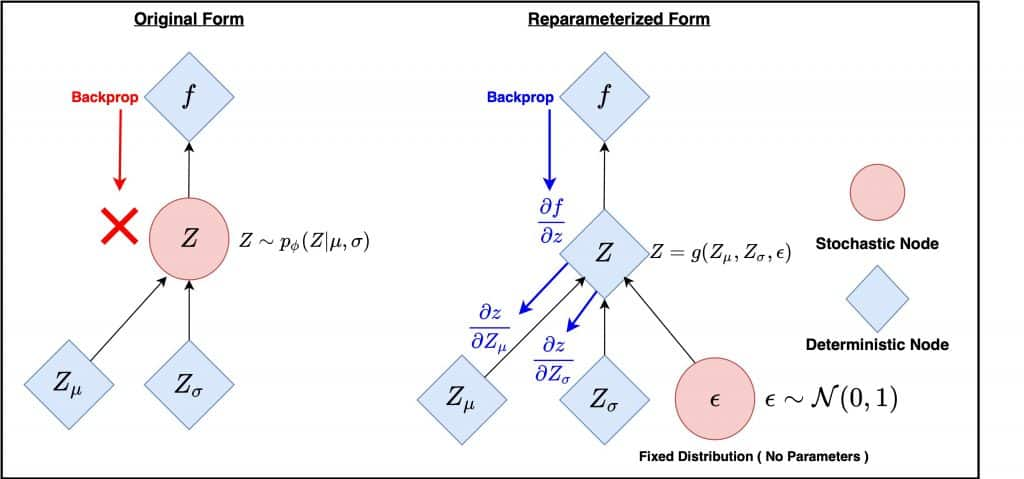

## The *multivariate* normal distribution

*Note: some of the mathematics (involving matrix algebra) in this section is slightly more complicated and may be closer to an <font color='orange'>`Intermediate`</font> level. If you are struggling with the matrices don't worry! We also present the special two-dimmensional case, which doesn't involve any matrices. The important take-aways here are not the mathematics, but rather the concepts and intuitions which are still 100% certified <font color='blue'>`Beginner`</font> friendly.* 🙌

TODO: introduce the idea of multivariate distribution and covariance via the multivariate normal.



### The sum rule and the product rule revisited!

TODO: now that we have a multivariate distribution we can properly introduce the sum and product rules.

### Batch and event shapes

In [ ]:
values = jnp.array([1., 2.])
normal = dist.Normal(0., 1.)
print(normal.event_shape)
print(normal.batch_shape)
print(f"p(X = {values}) = {jnp.exp(normal.log_prob(values))}")

In [ ]:
batch_normal = dist.Normal(jnp.array([0., 1.]), jnp.array([1., 2.]))
print(batch_normal.event_shape)
print(batch_normal.batch_shape)
print(f"p(X = {values}) = {jnp.exp(batch_normal.log_prob(values))}")
print(jnp.prod(jnp.exp(batch_normal.log_prob(values))))

In [ ]:
multivariate_diagonal_normal = dist.MultivariateNormal(jnp.array([0., 1.]), jnp.array([[1., 0.], [0., 2.**2]]))
print(multivariate_diagonal_normal.event_shape)
print(multivariate_diagonal_normal.batch_shape)
print(f"p(X = {values}) = {jnp.exp(multivariate_diagonal_normal.log_prob(values))}")

In [ ]:
multivariate_full_normal = dist.MultivariateNormal(jnp.array([0., 1.]), jnp.array([[1., 1.], [1., 2.**2]]))
print(multivariate_full_normal.event_shape)
print(multivariate_full_normal.batch_shape)
print(f"p(X = {values}) = {jnp.exp(multivariate_full_normal.log_prob(values))}")

## An important note on notation

In the text above we introduced a lot of new notation, so let's spend a little more time to make sure that everything is clear before moving on.

**$X$ vs $x$**

**$p(X = x)$ vs $p(X)$ vs $p_X(x)$ vs $p(x)$**

**What is the '$\mid$' in $p(X\mid a, b, c)$?**

## Task – comparing the normal distribution and another continuous distribution

Beta

### [Optional] comparing distributions with the KL-divergence – <font color='orange'>`Intermediate`</font>